# Where should I place a hotel to give tourists access to most points of information?

In [1]:
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians,pi
from utils import *
from data import listedEiggHotels, pointsOfInterest
import json
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [2]:
def graphTwoSetsByObservations(buildingLocs,obsLocs,dist=500):
    distance_away = dist

    G = nx.Graph()

    colorMap = (['gold'] * len(buildingLocs)) + (['blue'] * len(obsLocs))

    for k,r in enumerate(buildingLocs):
        G.add_node(k, color="green")

    for k,o in enumerate(obsLocs):
        G.add_node(k+len(buildingLocs), color="blue")

    for o_index,o in enumerate(obsLocs):
        for r_index,r in enumerate(buildingLocs):
            if seperationInMetres(o,r) < distance_away:
                G.add_edge(o_index+len(buildingLocs),r_index)
                
    return G, colorMap

def getIsolatesAtOffset(G,offset):
    degrees = G.degree()
    degreesOfInterest = filter(lambda x: x[1] == 0,degrees)
    degreesOfInterest = filter(lambda x: x[0] > offset, degreesOfInterest)
    nodeIds = map(lambda x: x[0],degreesOfInterest)
    
    return list(nodeIds)

def getBoundingBox(latLons):
    lats = list(map(lambda x: x[0],latLons))
    lons = list(map(lambda x: x[1],latLons))
        
    return [[min(lats),max(lats)],[min(lons),max(lons)]]

def addPseudoHotel(lat,lon):
    hotels = listedEiggHotels()
    hotels[",".join([str(lat),str(lon)])] = "Pseudo"
    
    return hotels

interests = toUsableLatLonList(pointsOfInterest().keys())
hotels = toUsableLatLonList(listedEiggHotels().keys())

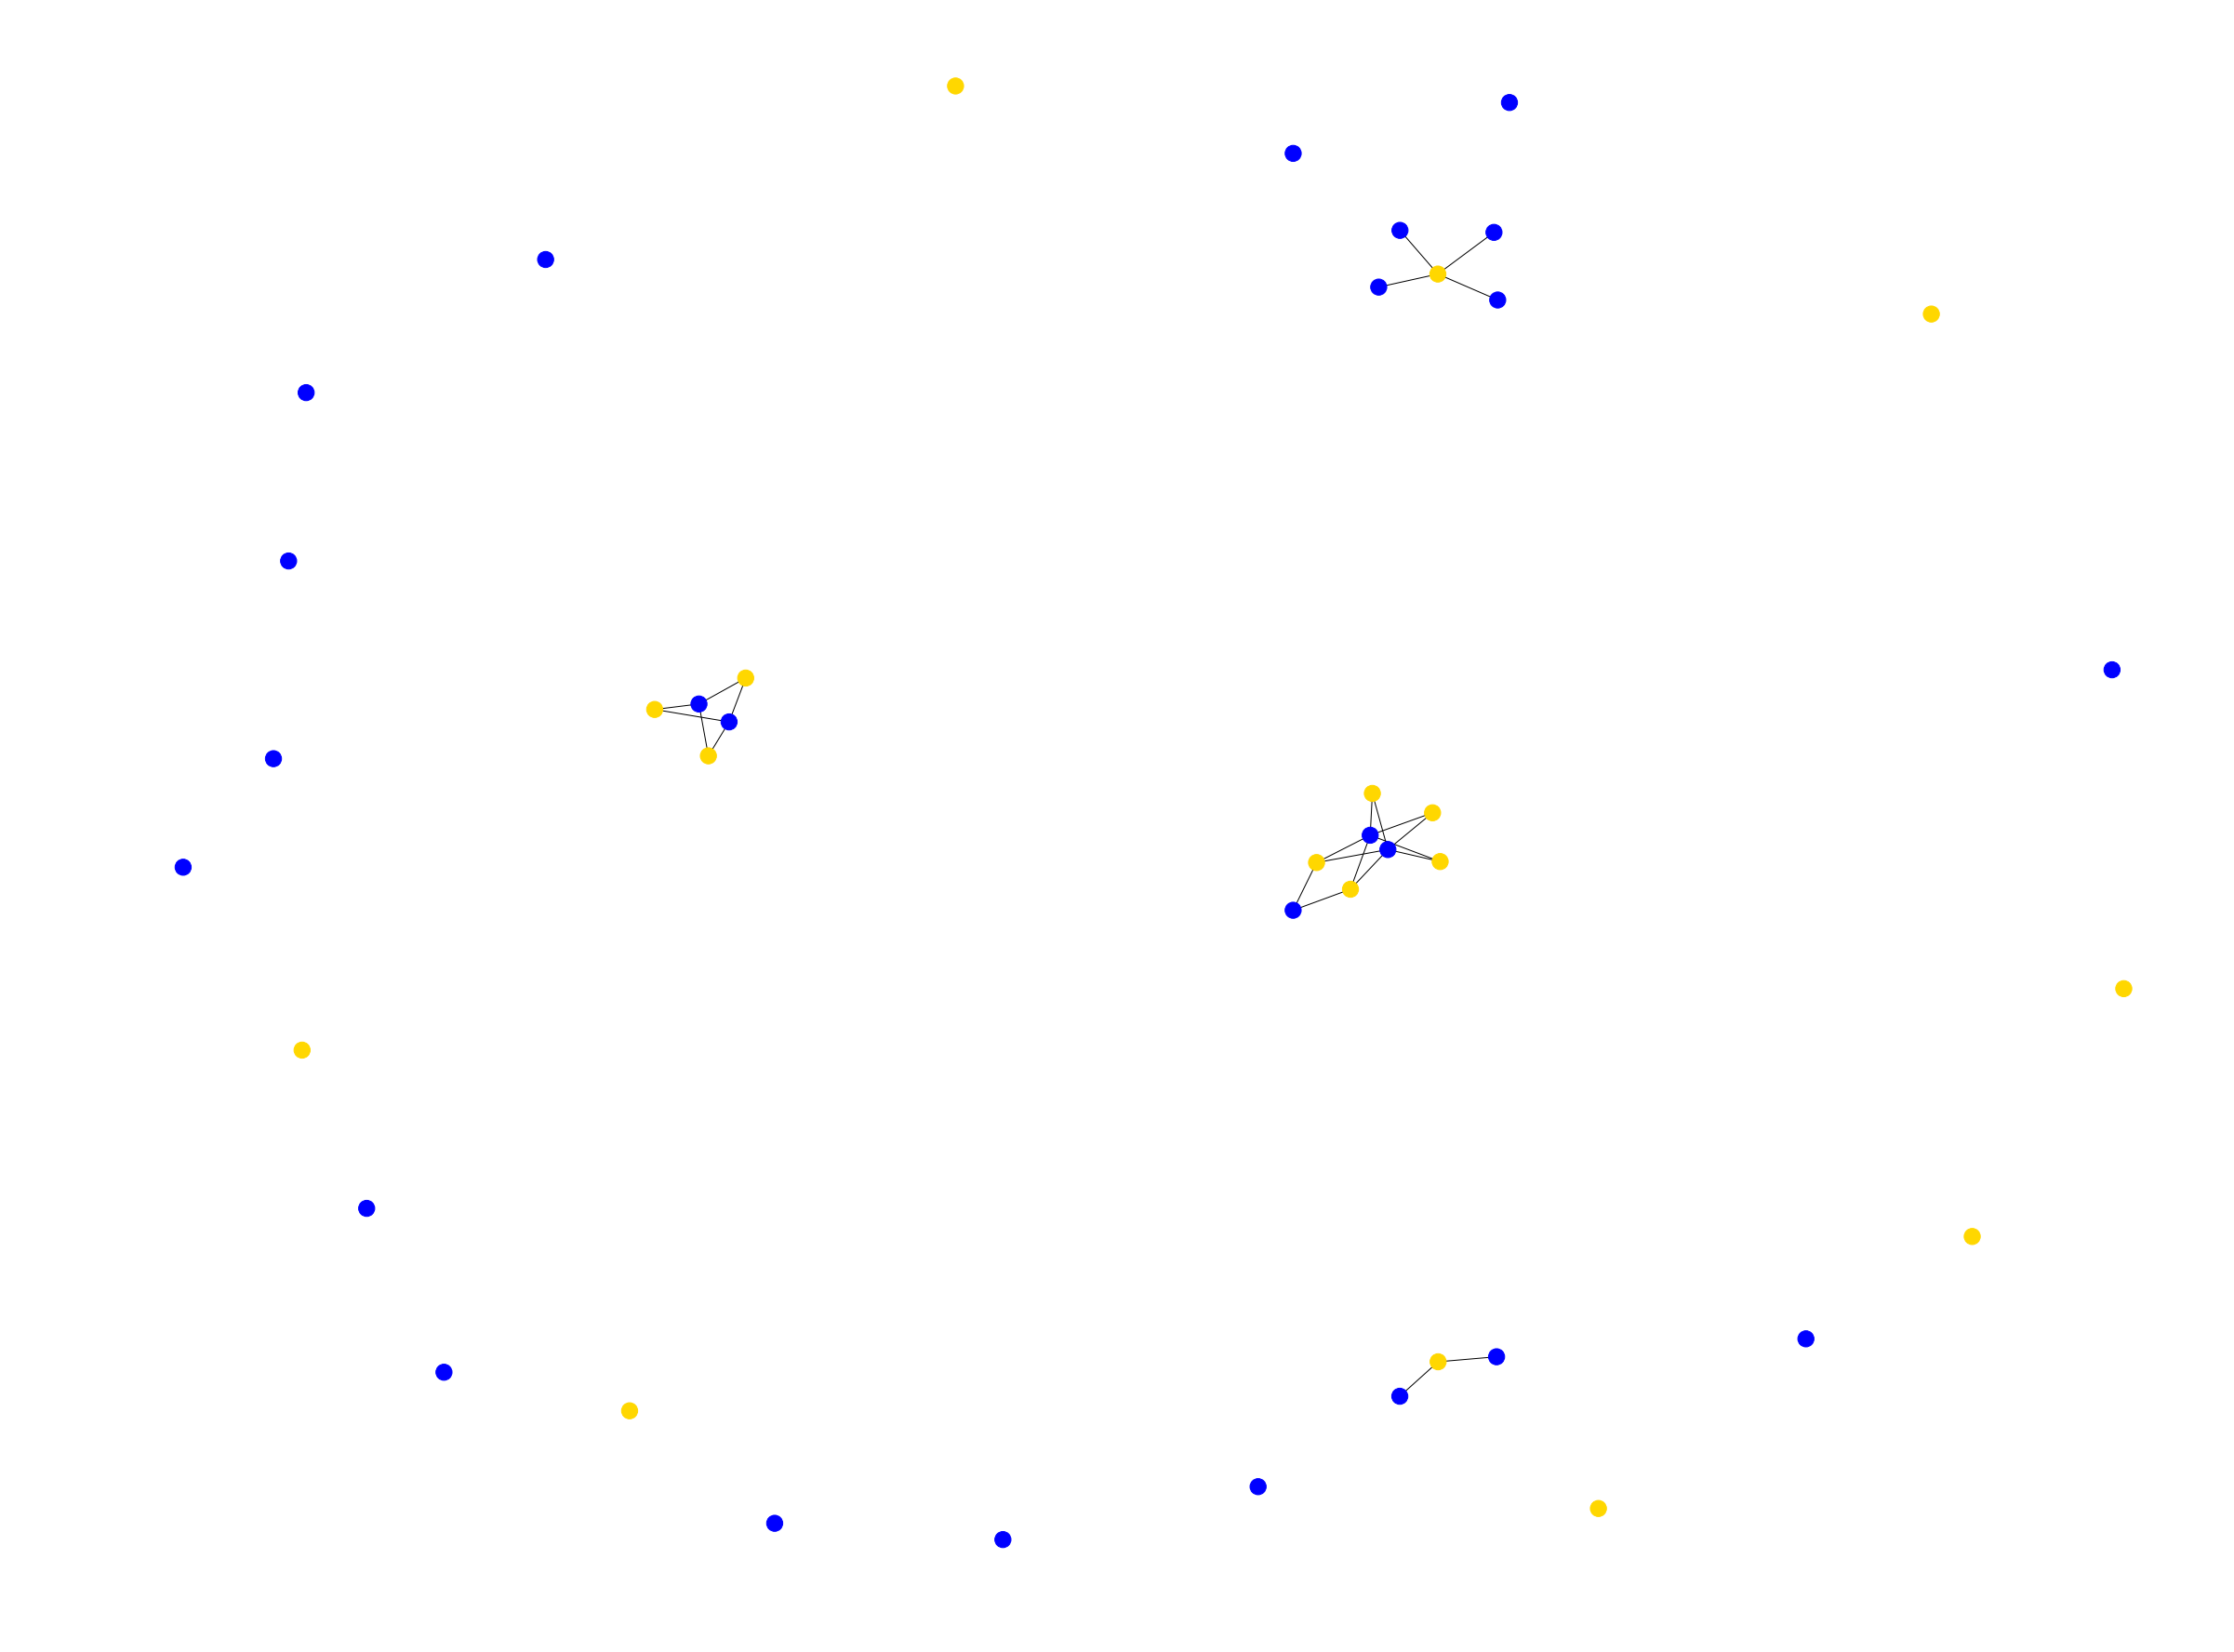

In [3]:
Goi, colorMap = graphTwoSetsByObservations(hotels,interests)
nx.draw(Goi, node_color=colorMap)

In [4]:
len(getIsolatesAtOffset(Goi,len(hotels)-1))

14

In [5]:
[minLat,maxLat],[minLon,maxLon] = getBoundingBox(hotels+interests)
optimals = []

horizontalMetres = seperationInMetres((minLat,minLon),(minLat,maxLon))
verticalMetres = seperationInMetres((minLat,minLon),(maxLat,minLon))

print(horizontalMetres,verticalMetres)

currentIsolates = len(getIsolatesAtOffset(Goi,len(hotels)-1))

currLatOffset = 0
currLonOffset = 0

while currLonOffset+100 < horizontalMetres:
    while abs(currLatOffset)+100 < verticalMetres:
        newLat, newLon = transformLatLonByXMetres(maxLat,minLon,currLatOffset,currLonOffset)
        newHotels = toUsableLatLonList(addPseudoHotel(newLat,newLon).keys())
        
        Goi, colorMap = graphTwoSetsByObservations(newHotels,interests)
        if(len(getIsolatesAtOffset(Goi,len(newHotels)-1)) < currentIsolates):
            currentIsolates = len(getIsolatesAtOffset(Goi,len(newHotels)-1))
            optimals = [newLat,newLon]
        
        currLatOffset -= 100
    
    currLonOffset += 100
    currLatOffset = 0
    
optimals

6130.895797321686 8416.97281716638


[56.882495621816346, -6.172800731120484]

In [6]:
interests = toUsableLatLonList(pointsOfInterest().keys())
hotels = toUsableLatLonList(listedEiggHotels().keys())
Goi, colorMap = graphTwoSetsByObservations(hotels,interests)

generateMapJSON([('./fullColMarkers/marker76.png',hotels),('./fullColMarkers/marker2.png',interests),('./fullColMarkers/marker18.png',[[56.882495621816346,-6.172800731120484]])],[(hotels+interests,Goi)],"testingNewHotel.txt")
